# Import Libraries

1. '**from google.colab import file**' module is used to enable file upload functionality which used to upload the sensor data to the google colab environment. (Reference : https://saturncloud.io/blog/uploading-local-files-using-google-colab/ Step 2. I already tired Step 1, 3 in my previous assignments on machine learning and BIS so need to try other methods)

2. '**import pandas as pd**' - pandas library is used for data analysis and this provide the dataframe structures to handle the detaset in tabular form which is easy for manupulate like in the database.

3. '**import matplotlib.pyplot as plt**' - library for create illustrations and visualasation in python, here its used to plot sensor locations on the map.

4. '**from IPython.display import display**' - the display function from the IPython.display is used to show tabes in much interactive format. The tables are used for cleaned_data table to validate the plots on map with the cleaned data. Also distribution of grow sensors in the latitude and longitude is iterated in to a distribution chart so that the plotting can be validated.

5. '**from matplotlib.offsetbox import OffsetImage, AnnotationBbox**' - this function is used to overlay the plots into the map images. (Reference : https://medium.com/analytics-vidhya/how-to-plot-image-and-text-on-matplotlib-91d7f23a3043 )

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Upload & Read CSV file to dataframe

The below line of codes are for uploading the CSV from the local drive the module in GoogleColab and reading the files into a Pandas DataFrame. There will be a prompt to user to upload the file and after uploading the data in the CSV is read into the DataFrame named 'data'

Reference : https://saturncloud.io/blog/uploading-local-files-using-google-colab/ Step 2

In [2]:
# Upload the 'Growlocations.csv' file
uploaded = files.upload()

# Read the data into a DataFrame
data = pd.read_csv(list(uploaded.keys())[0])

display(data)

Saving GrowLocations.csv to GrowLocations.csv


,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
...,...,...,...,...,...,...,...,...
39289,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z
39290,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z
39291,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z
39292,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z


#Swapping the Latitude & Longitude Values
From the assumption from the tests done on the python notebook ( https://colab.research.google.com/drive/1bl38E6p5xBKDpKc7Yc-BP-XY19qr3Ttu?usp=sharing ) the incorrectness of column name is validated so swapping the Latitude and Longitude Values for getting desired result.

In [27]:
# Swap 'Latitude' and 'Longitude' values
data['Latitude'], data['Longitude'] = data['Longitude'], data['Latitude']

# Cleaning & Filtering Data

The code filters the latitude and longitude in the desired range between the location frame bound with in the map provided. And the filtered rows are write into a new dataframe called - 'cleaned_data'. Then the cleaned data frame is displayed for validation and check the distribution. Also while checking the format of the dataframe we can understand the latitude is coming first, but in the mapping longitude is in the x-axis so for the data manipulation we need consider longitude to first since those data come to x-axis and latitude data to y-axis.

In [28]:
# Function to filter and clean the data
def clean_data(data):
    # Filter rows out of desired latitude and longitude range
    valid_data = data[(data['Longitude'] >= -10.60 ) & (data['Longitude'] <= 1.70) &
                      (data['Latitude'] >= 50.60) & (data['Latitude'] <=58.0 )]
    return valid_data

# Clean the data
cleaned_data = clean_data(data)

print("\nCleaned Data:")
display(cleaned_data)


Cleaned Data:


,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,54.980,-7.923,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,54.980,-7.923,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,54.980,-7.923,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,54.980,-7.923,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,54.980,-7.923,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
...,...,...,...,...,...,...,...,...
39259,PI040298AA3K026204,51.396,0.122,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_vnbfmkdp,2019-10-30T11:17:34.000Z,2019-10-30T16:02:34.000Z
39260,PI040298AA3K026204,51.396,0.122,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_vnbfmkdp,2019-10-30T11:17:34.000Z,2019-10-30T16:02:34.000Z
39261,PI040298AA3K026204,51.396,0.122,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_vnbfmkdp,2019-10-30T11:17:34.000Z,2019-10-30T16:02:34.000Z
39262,PI040298AA3K026204,51.396,0.122,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_vnbfmkdp,2019-10-30T11:17:34.000Z,2019-10-30T16:02:34.000Z


## Distribution of Sensors & Its Frequencies

***Distribution of Longitude***

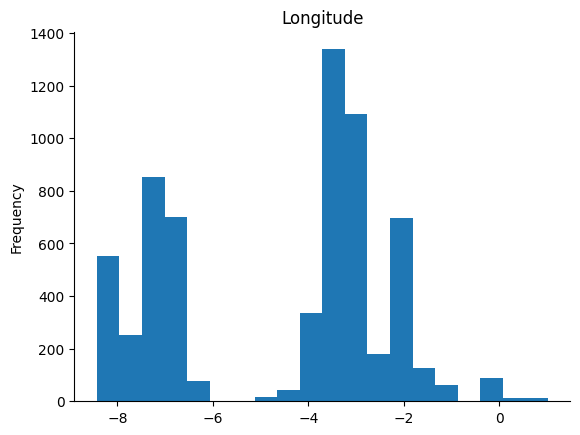

In [29]:
from matplotlib import pyplot as plt
cleaned_data['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

***Distribution of Latitude***

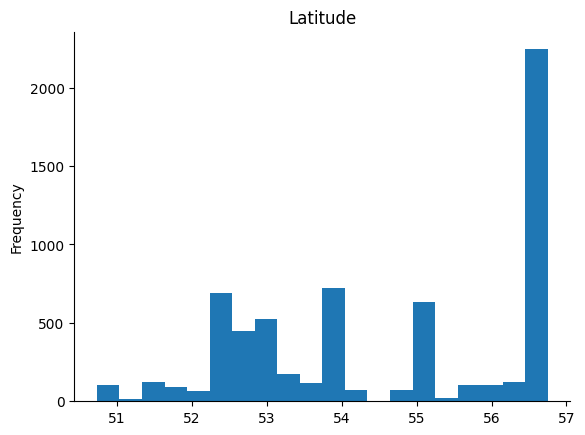

In [30]:
from matplotlib import pyplot as plt
cleaned_data['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

***Scatted Mapping of Sensors***

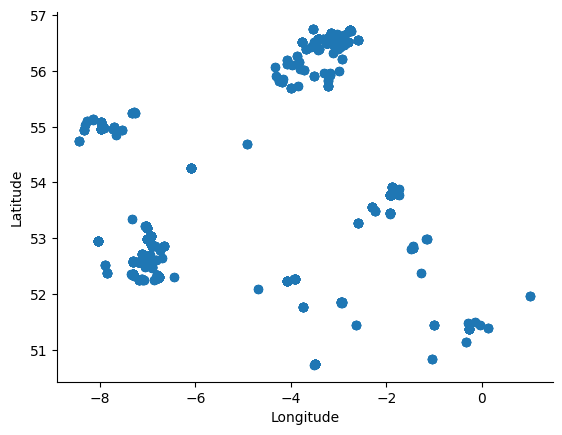

In [31]:
from matplotlib import pyplot as plt
cleaned_data.plot(kind='scatter', x='Longitude',y='Latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Plotting the Scatted Mapping to the Given Map

The below code loads the map image, create the plot of map and sensor location and plot the valid sensor location to the map and display the same and generate output_map.

Reference : https://medium.com/analytics-vidhya/how-to-plot-image-and-text-on-matplotlib-91d7f23a3043

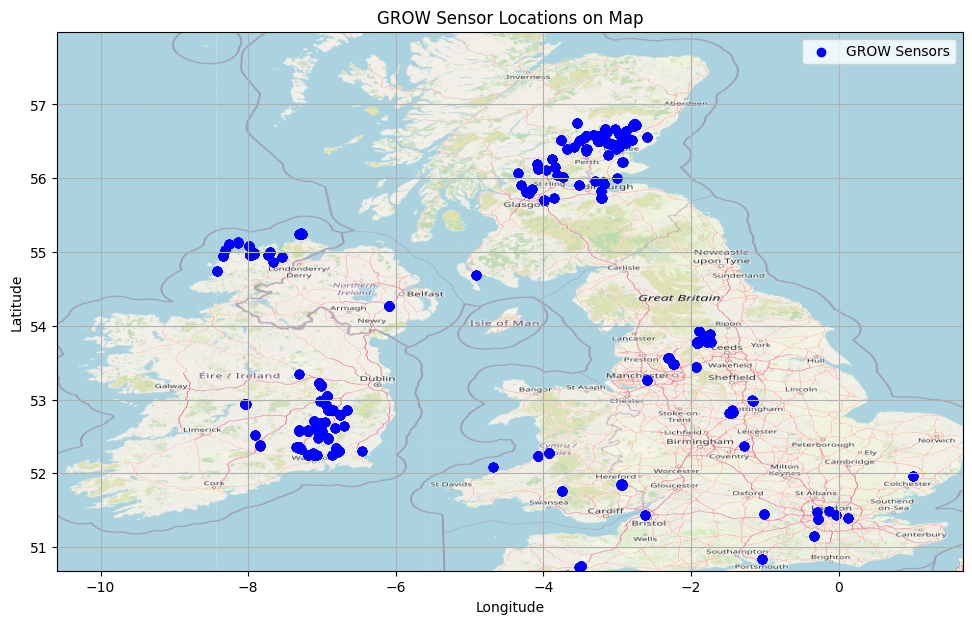

In [32]:
# Load the map image
map_image = plt.imread('map.png')

# Overlay the map image over the plotted sensor locations in given latitude and longitude range
fig, ax = plt.subplots(figsize=(12,7))
ax.imshow(map_image, extent=[ -10.592, 1.6848,50.681, 57.985])

# Plot the valid sensor locations in the cleaned data with scatter methods
ax.scatter(cleaned_data['Longitude'], cleaned_data['Latitude'], marker='o', color='blue', label='GROW Sensors')

# Display the map and sensor locations
plt.title('GROW Sensor Locations on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

# Save the output to a file named 'outputmap.png'
plt.savefig('outputmap.png')
plt.show()